## Calculating target variable over time

In [2]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta, date
from getFinancialData import getFinancialData
import matplotlib.pyplot as plt

In [3]:
start = datetime(2000,1,1)
end = datetime(2010,1,1)
df = getFinancialData(start, end)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,97.60,97.60,94.72,95.75,8164300,0.0,0
2000-01-04 00:00:00-05:00,94.49,94.84,91.93,92.00,8089800,0.0,0
2000-01-05 00:00:00-05:00,92.13,93.17,90.36,92.17,12177900,0.0,0
2000-01-06 00:00:00-05:00,91.92,93.15,90.69,90.69,6227200,0.0,0
2000-01-07 00:00:00-05:00,92.37,95.95,92.21,95.95,8066500,0.0,0


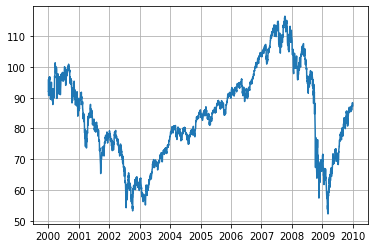

In [4]:
ts = df["Close"]
plt.plot(ts)
plt.grid()

In [10]:
x = [] # Two weeks of time series
y = [] # Target variable: % change in following day (-> buy or sell today)

for year in range(2000, 2020):
    start = datetime(year,1,1)
    end = datetime(year,12,31)
    df = getFinancialData(start, end)

    for week in range(df.index[-1].isocalendar()[1]):
        init_date = date(year,1,1) + timedelta(week*7)
        final_date = date(year,1,1) + timedelta((week+2)*7)
        
        x.append(df[(df.index.date >= init_date) & (df.index.date <= final_date)]["Close"])
        final_val = df[df.index.date <= final_date].iloc[-1]["Close"]
        try:
            next_val = df[df.index.date > final_date].iloc[0]["Close"]
        except Exception as e:
            print(e)
            print(final_date)
        y.append((next_val - final_val)/final_val)
    



single positional indexer is out-of-bounds
2000-12-30
single positional indexer is out-of-bounds
2001-01-06
single positional indexer is out-of-bounds
2001-12-31
single positional indexer is out-of-bounds
2002-01-07
single positional indexer is out-of-bounds
2004-12-30
single positional indexer is out-of-bounds
2005-01-06
single positional indexer is out-of-bounds
2005-01-13
single positional indexer is out-of-bounds
2005-12-31
single positional indexer is out-of-bounds
2006-01-07
single positional indexer is out-of-bounds
2006-12-31
single positional indexer is out-of-bounds
2007-01-07
single positional indexer is out-of-bounds
2007-12-31
single positional indexer is out-of-bounds
2008-01-07
single positional indexer is out-of-bounds
2009-12-31
single positional indexer is out-of-bounds
2010-01-07
single positional indexer is out-of-bounds
2010-01-14
single positional indexer is out-of-bounds
2010-12-31
single positional indexer is out-of-bounds
2011-01-07
single positional indexer is

In [11]:
# Standardize indexes
for i in range(len(x)):
    x[i].index = [*range(0,x[i].size)]

In [12]:
pd.DataFrame(x).to_csv("data/x.csv")

In [13]:
pd.DataFrame(y).to_csv("data/y.csv")